# Challenge 1 - Energy Production Data Simulation




In [169]:
# -*- coding:utf-8 -*-
import csv
import numpy as np
from numpy import set_printoptions
import pandas as pd
from pandas import read_csv
import seaborn as sns
import itertools
import matplotlib.gridspec as gridspec

import statsmodels.tsa.stattools as st
import matplotlib.pyplot as plt
import statsmodels.tsa.vector_ar as var
import statsmodels.tsa.api
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split 

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions


np.random.seed(0)


%matplotlib inline

# Data Exploration and investigate .

Using **shape** we investigate  data. how many **attributes** and how many **observations** there are in our data set.

In [106]:
df1.tail(5)

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
11995,11995,19,500,2013,2,4.2,201.8,638
11996,11996,20,500,2013,3,11.2,234.0,778
11997,11997,21,500,2013,4,13.6,237.1,758
11998,11998,22,500,2013,5,19.2,258.4,838
11999,11999,23,500,2013,6,22.7,122.9,586


The most interesting values was 

the **Year** variabele, i find out the **2012** has ``6000`` record been counted where **2011, and 2013** only has `3000` record each , as figure bellow  :




In [66]:
dataframe1['Year'].value_counts()

2012    6000
2013    3000
2011    3000
Name: Year, dtype: int64

## Finding number of unique Data Points

In [188]:
print("Finding number of unique Data Points")
print()
print("ID = ", len(dataframe1.ID.unique()))
print("Label = ", len(dataframe1.Label.unique()))
print("House = ", len(dataframe1.House.unique()))
print("Year = ", len(dataframe1.Year.unique()))
print("Month = ", len(dataframe1.Month.unique()))
print("Temperature = ", len(dataframe1.Temperature.unique()))
print("Daylight = ", len(dataframe1.Daylight.unique()))
print("EnergyProduction = ", len(dataframe1.EnergyProduction.unique()))

Finding number of unique Data Points

ID =  12000
Label =  24
House =  500
Year =  3
Month =  12
Temperature =  207
Daylight =  490
EnergyProduction =  387


Plot pairwise relationships in a dataset.

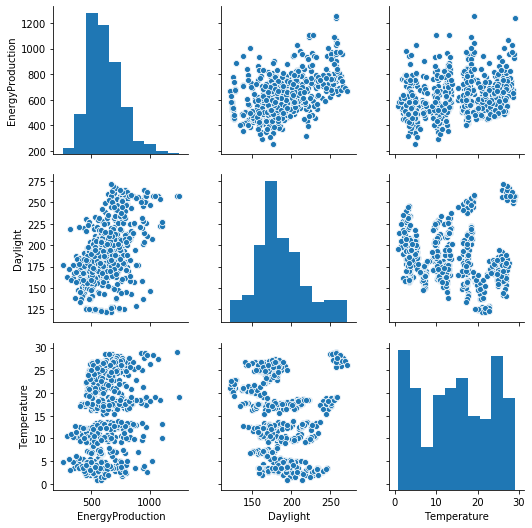

In [150]:
sns.pairplot(dataframe1[['EnergyProduction','Daylight','Temperature']])

## The relationship, between random variables on data

The **relationship**,  between random variables on data

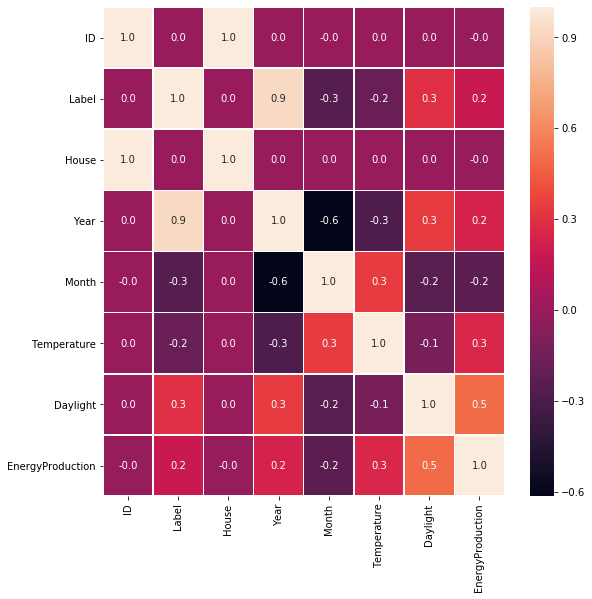

In [52]:
#correlation map
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(dataframe1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### The relationship, between random variables on data using  color map from linear mapping segments

In [191]:
cmap = cmap=sns.diverging_palette(10, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "9pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '300px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '90px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
ID,1,0.002,1,0.0018,-0.00051,0.00035,0.002,-0.0074
Label,0.002,1,0,0.92,-0.25,-0.18,0.3,0.18
House,1,0,1,0,0,0.00071,0.0014,-0.0078
Year,0.0018,0.92,0,1,-0.61,-0.28,0.34,0.24
Month,-0.00051,-0.25,0,-0.61,1,0.34,-0.24,-0.23
Temperature,0.00035,-0.18,0.00071,-0.28,0.34,1,-0.12,0.26
Daylight,0.002,0.3,0.0014,0.34,-0.24,-0.12,1,0.5
EnergyProduction,-0.0074,0.18,-0.0078,0.24,-0.23,0.26,0.5,1


#### Comment  
Bellow  **figure** shows a rectangular Plot of the data as a color-encoded matrix. This is an Axes-level function and draw the heatmap  . **figure** shows there is positive correlation between Energy Production and Daylight

However, we can see in figure bellow there is relation amongst variables highlighted with a blue square :

   - A moderate negative relation between **Year** and **Months** = `-0.6`
   - A weak negative (downhill sloping) relationship between **Year** and **Temperature** = `–0.3` 
   - A weak negative (downhill sloping) relationship between **Months** and **EnergyProduction** = `+0.2`
   - A weak positive (upward sloping) relationship between **Temperature** and **EnergyProduction** = `+0.3`
   - A moderate positive (upward sloping) relationship between **Daylight** and **EnergyProduction** = `+0.50`
   

<br>

<img src="untitled.png" align="left"/>

### Plot pairwise relationships in a dataset.

,Daylight,EnergyProduction
Daylight,1.000000,0.519554
EnergyProduction,0.519554,1.000000


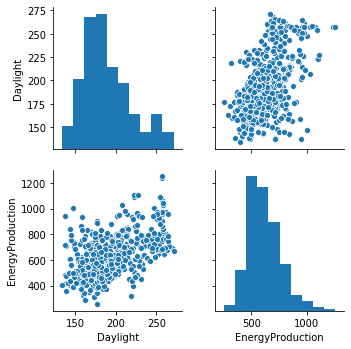

In [97]:
null = sns.pairplot(u_data_train[['Daylight','EnergyProduction']])
pd.DataFrame(np.corrcoef(u_data_train[['Daylight','EnergyProduction']].T),columns=['Daylight','EnergyProduction'],index=['Daylight','EnergyProduction'])

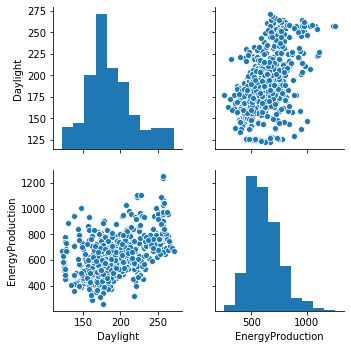

In [152]:
sns.pairplot(df1[['Daylight','EnergyProduction']])

###  visual overview   

graph and table form a regression of Daylight and Temperature .

data is of time series Plotting .

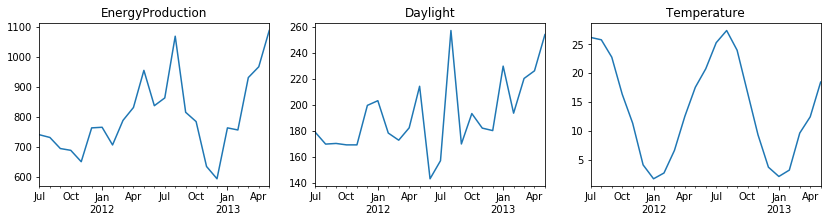

In [148]:
rng=pd.date_range('7/1/2011', '6/1/2013', freq='M')
house1 = data_train[data_train.House==1][['EnergyProduction','Daylight','Temperature']].set_index(rng)
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, column in enumerate(house1.columns):
    house1[column].plot(ax=axes[i], figsize=(14,3), title=column)

descriptive statistics about data. 

- **mean** = average 
- **median** = values in the middle of the rage
- **mode** = The number which appears most often in a set of numbers

In the dataframe below we are assigning our dataframe to an array. 

In [108]:
df1.describe()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,11.500000,250.500000,2012.000000,6.500000,14.677892,186.454767,611.666583
std,3464.24595,6.922475,144.343293,0.707136,3.452196,8.442057,31.525892,140.608265
min,0.00000,0.000000,1.000000,2011.000000,1.000000,0.800000,121.800000,254.000000
25%,2999.75000,5.750000,125.750000,2011.750000,3.750000,6.175000,167.100000,509.000000
50%,5999.50000,11.500000,250.500000,2012.000000,6.500000,14.550000,180.400000,588.000000
75%,8999.25000,17.250000,375.250000,2012.250000,9.250000,22.700000,204.300000,695.000000
max,11999.00000,23.000000,500.000000,2013.000000,12.000000,29.000000,271.300000,1254.000000


In [109]:
array1 = df1.values

In [110]:
array1

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.6200e+01, 1.7890e+02,
        7.4000e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.5800e+01, 1.6970e+02,
        7.3100e+02],
       [2.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.2800e+01, 1.7020e+02,
        6.9400e+02],
       ...,
       [1.1997e+04, 2.1000e+01, 5.0000e+02, ..., 1.3600e+01, 2.3710e+02,
        7.5800e+02],
       [1.1998e+04, 2.2000e+01, 5.0000e+02, ..., 1.9200e+01, 2.5840e+02,
        8.3800e+02],
       [1.1999e+04, 2.3000e+01, 5.0000e+02, ..., 2.2700e+01, 1.2290e+02,
        5.8600e+02]])

we assinging **X** and **y** to an array.  an array starts at **0**.  we have **8** rows. the array from 0 to 7.  **y** array below the column in the array mapped to the **7th row**.

In [111]:
X1 = array1[:,0:7] 
Y1 = array1[:,7]

We are using group by to view the distribution of values in our column. this column is  **target variable**. 
It's that thing we are trying to predict. 

when it comes to scoring our model. Classiﬁcation accuracy is the number of correct predictions made as a ratio of all predictions made. 

This is the most common evaluation metric for classiﬁcation problems, it is also the most misused.

**Accuracy** is only really useful when there are an even distribution of values in a data set. 

our data set they are nearly perfectly even. 

# Algorithms 

import a model called **train_test_split** and one called **SVC**. 


importing a Support Vector Machine (sklearn.**svm**)

 SVC is a classifier in the labled data section. 
 
In sklearn it's called a SVC or support vector classifier. 

supervised learning algorithm for classification ror fo regression. they draw a boundary between clusters of data.


In [115]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

## data split  Test/Train

**I will hold out part of the available data as a test set** ``X_test, y_test`` 


 70/30 


In [116]:
test_size = 0.30
seed = 7

The seed above is so we can reproduce our results. 

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=test_size, random_state=seed)

## SVC Algorithms 

In [118]:
model = SVC()

### fitting Algorithms

fitting our model variable to training set. 

we call the model as is without any parameters. 


In [119]:
model.fit(X_train, Y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

###  First Result of SVC model 

In [120]:
result = model.score(X_test, Y_test)

In [121]:
result
print("result= %f" % (result*100.0)) 

0.0075

### Accuracy of SVC

print the accuracy of our model. 

In [138]:
#print("Accuracy: %.3f%%") % (result*100.0)

print("Accuracy= %f" % (result*100.0)) 

Accuracy= 91.750000


 ### A ) parameter tuning &  Better  result = 92 % 

In the code below i will put tune our parameter for better accuracy result , So :

I have change the ``seed`` from 7 to 45 . 

In [140]:


filename = 'dataset_500.csv'
dataframe = read_csv(filename) 

array = dataframe.values
X = array[:,0:7] 
Y = array[:,7]

test_size = .30
seed = 45
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, Y_train) 

result = model.score(X_test, Y_test)

#print("Accuracy: %.3f%%") % (result*100.0)
print("Better Accuracy= %f" % (result*100.0)) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Better Accuracy= 92.000000


### B ) parameter tuning &  Better  result   = 93 %

In the code below i will put tune our parameter for better accuracy result , So :

I have change the ``split TEST data size `` from **30**  TO **25** . 

In [141]:


filename = 'dataset_500.csv'
dataframe = read_csv(filename) 

array = dataframe.values
X = array[:,0:7] 
Y = array[:,7]

test_size = .25
seed = 45
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, Y_train) 

result = model.score(X_test, Y_test)

#print("Accuracy: %.3f%%") % (result*100.0)
print("Better Accuracy= %f" % (result*100.0)) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Better Accuracy= 93.866667


---

## Different Algorithms

I use a different Algorithms for the  tests. 

I will  run our entire model in one cell. 

I will have to take two steps to substitue another model. 


- I will Import the new model. (from sklearn.neighbors import KNeighborsClassifier)
- I will then Map the model variable to the new algorithm. (model = KNeighborsClassifier())

I use comments below to show what was changed. 

In [147]:
filename = 'dataset_500.csv'
dataframe = read_csv(filename) 

array = dataframe.values
X = array[:,0:7] 
Y = array[:,7]

test_size = .30
seed = 45
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = SVC()
model.fit(X_train, Y_train) 

result = model.score(X_test, Y_test)

#print("Accuracy: %.3f%%") % (result*100.0)
print("Different Algorithms Accuracy= %f" % ((result*100)*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Different Algorithms Accuracy= 88.888889


### Ensemble Methods

Ensemble methods combine several machine learning techniques into one predictive model to decrease variance (bagging), bias , to improve predictions (stacking). 

 - divided into two groups: sequential ensemble methods where the base learners are generated sequentially 
 - and parallel ensemble methods where the base learners are generated in parallel . 
 
*** The basic motivation of sequential methods is :

   - to exploit the dependence between the base learners since the overall performance can be boosted by weighing previously mislabeled examples with higher weight. 

   - to exploit independence between the base learners since the error can be reduced dramatically by averaging.

    **Bagging**

    Bagging stands for bootstrap aggregation to reduce the variance of an estimate is to average together multiple estimates. For example, we can train  M different trees \fm  on different subsets of the data (chosen randomly with replacement) and compute the ensemble: 
        - Bagging uses bootstrap sampling to obtain the data subsets for training the base learners. For aggregating the outputs of base learners, bagging uses voting for classification and averaging for regression.
        
        $$f(x)=\frac{1}{M}\sum_{m} $$

In [172]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

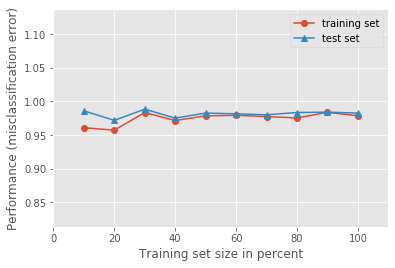

In [173]:
plt.figure()
plot_learning_curves(X_train, Y_train, X_test, Y_test, bagging1, print_model=False, style='ggplot')
plt.show()

figure above shows learning curves for the bagging tree ensemble, and the average error of `0.3` on the **training** data and a U-shaped error curve for the testing data. The smallest gap between training and test errors occurs at around ` 80 %` of the training set size.

In [174]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X,Y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

In [176]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [178]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [183]:
#plot learning curves
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
      

### prediction model  evaluation 

#### with Vector autoregression   

In [192]:
data_per_house=[tuple([tuple(data_train[data_train.House==x][column]) for column in ['Temperature','Daylight','EnergyProduction']]) for x in range(1,501)]
data_uniq=[]; datai=[]
for j, i in enumerate(data_per_house):
    if not i in datai:
        datai.append(i)
        data_uniq.append(j+1)
        
data_uniq_len = len(set(data_per_house))
print ("houses: " + str(data_uniq_len))

houses: 28


According to the result of this regression analysis, we've got a MAPE of 8.694%.
In this analysis, we did not deal with seasonal trend although they exsist obviously.
This is because typical technic for removing the trend is to use 12 month moving average which needs at least 3 years data.
We might obtain more better result when seasonal trend can be removed.

#### Result of Accuracy MAPE

The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error,  forecasting model should be the baseline for determining whether your values are good

In [202]:
def mape_of_var(house, predfile, mapefile):
    sum0 = 0
    f_pred = open(predfile, 'w')
    f_mape = open(mapefile, 'w')
    pred_writer = csv.writer(f_pred)
    pred_writer.writerow(['House','EnergyProduction'])
    for i in house:
        data = data_train[data_train.House==i][['EnergyProduction','Daylight','Temperature']].set_index(rng)
        data_diff = data.diff().dropna()
        model = var.var_model.VAR(data_diff)
        results = model.fit(5, trend='nc')
        lag_order = results.k_ar
        data_pred = results.forecast(data_diff.values[-lag_order:],1)[0,0]+data.EnergyProduction[-1]
        sum0 = sum0 + abs(data_pred-data_test.EnergyProduction[i-1])/data_test.EnergyProduction[i-1]
        pred_writer.writerow([i,data_pred])

    mape = round(sum0/len(house),3)
    f_mape.write(str(mape))
    f_pred.close()
    f_mape.close()

    return mape
   

VAR model per 28 and 500 house MAPE form predicted data 

In [203]:
 
print ('VAR model per 28 house MAPE : ' + str(mape_of_var(data_uniq, 'HouseEnergyProduction.csv','mape_uniq.txt')))
print ('VAR model per 500 houses MAPE: ' + str(mape_of_var(range(1,501), 'HouseEnergyProductionall.csv','mape_all.txt')))

VAR model per 28 house MAPE : 0.284
VAR model per 500 houses MAPE: 0.265


#### comment on result 

the model made from original data-set is overestimated by 0.1%. as it show MAPE for 28 is 0.097 and for the 500 houses is 0.097. It means  